# DS 116 Data Visualization

## Homework 3

### Aram Abrahamyan

### Part 1: Analytical Questions

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
sns.set_style("dark")

In [128]:
df = pd.read_csv('mobiles_dataset.csv')
df.head()

,Company.Name,Model.Name,Mobile.Weight,RAM,Front.Camera,Back.Camera,Processor,Battery.Capacity.mAh,Screen.Size.inches,Launched.Price.Pakistan.PKR,Launched.Price.India.INR,Launched.Price.China.CNY,Launched.Price.USA.USD,Launched.Price.Dubai.AED,Launched.Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,224999,79999,5799,799,2799,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,234999,84999,6099,849,2999,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,244999,89999,6499,899,3199,2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,249999,89999,6199,899,3199,2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,259999,94999,6499,949,3399,2024


In [129]:
df['Launched.Price.Pakistan.PKR']= df['Launched.Price.Pakistan.PKR'] * 0.0036
df['Launched.Price.India.INR'] = df['Launched.Price.India.INR'] * 0.011
df['Launched.Price.China.CNY']= df['Launched.Price.China.CNY'] * 0.14
df['Launched.Price.Dubai.AED'] = df['Launched.Price.Dubai.AED'] * 0.27
df['Company.Name'].replace('Poco', 'POCO', inplace=True)
df.head()

,Company.Name,Model.Name,Mobile.Weight,RAM,Front.Camera,Back.Camera,Processor,Battery.Capacity.mAh,Screen.Size.inches,Launched.Price.Pakistan.PKR,Launched.Price.India.INR,Launched.Price.China.CNY,Launched.Price.USA.USD,Launched.Price.Dubai.AED,Launched.Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,809.9964,879.989,811.86,799,755.73,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,845.9964,934.989,853.86,849,809.73,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,881.9964,989.989,909.86,899,863.73,2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,899.9964,989.989,867.86,899,863.73,2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,935.9964,1044.989,909.86,949,917.73,2024


1. Does battery capacity influence the launched price of a smartphone? Check this variability across all currencies. Is there any type of difference between behaviors?

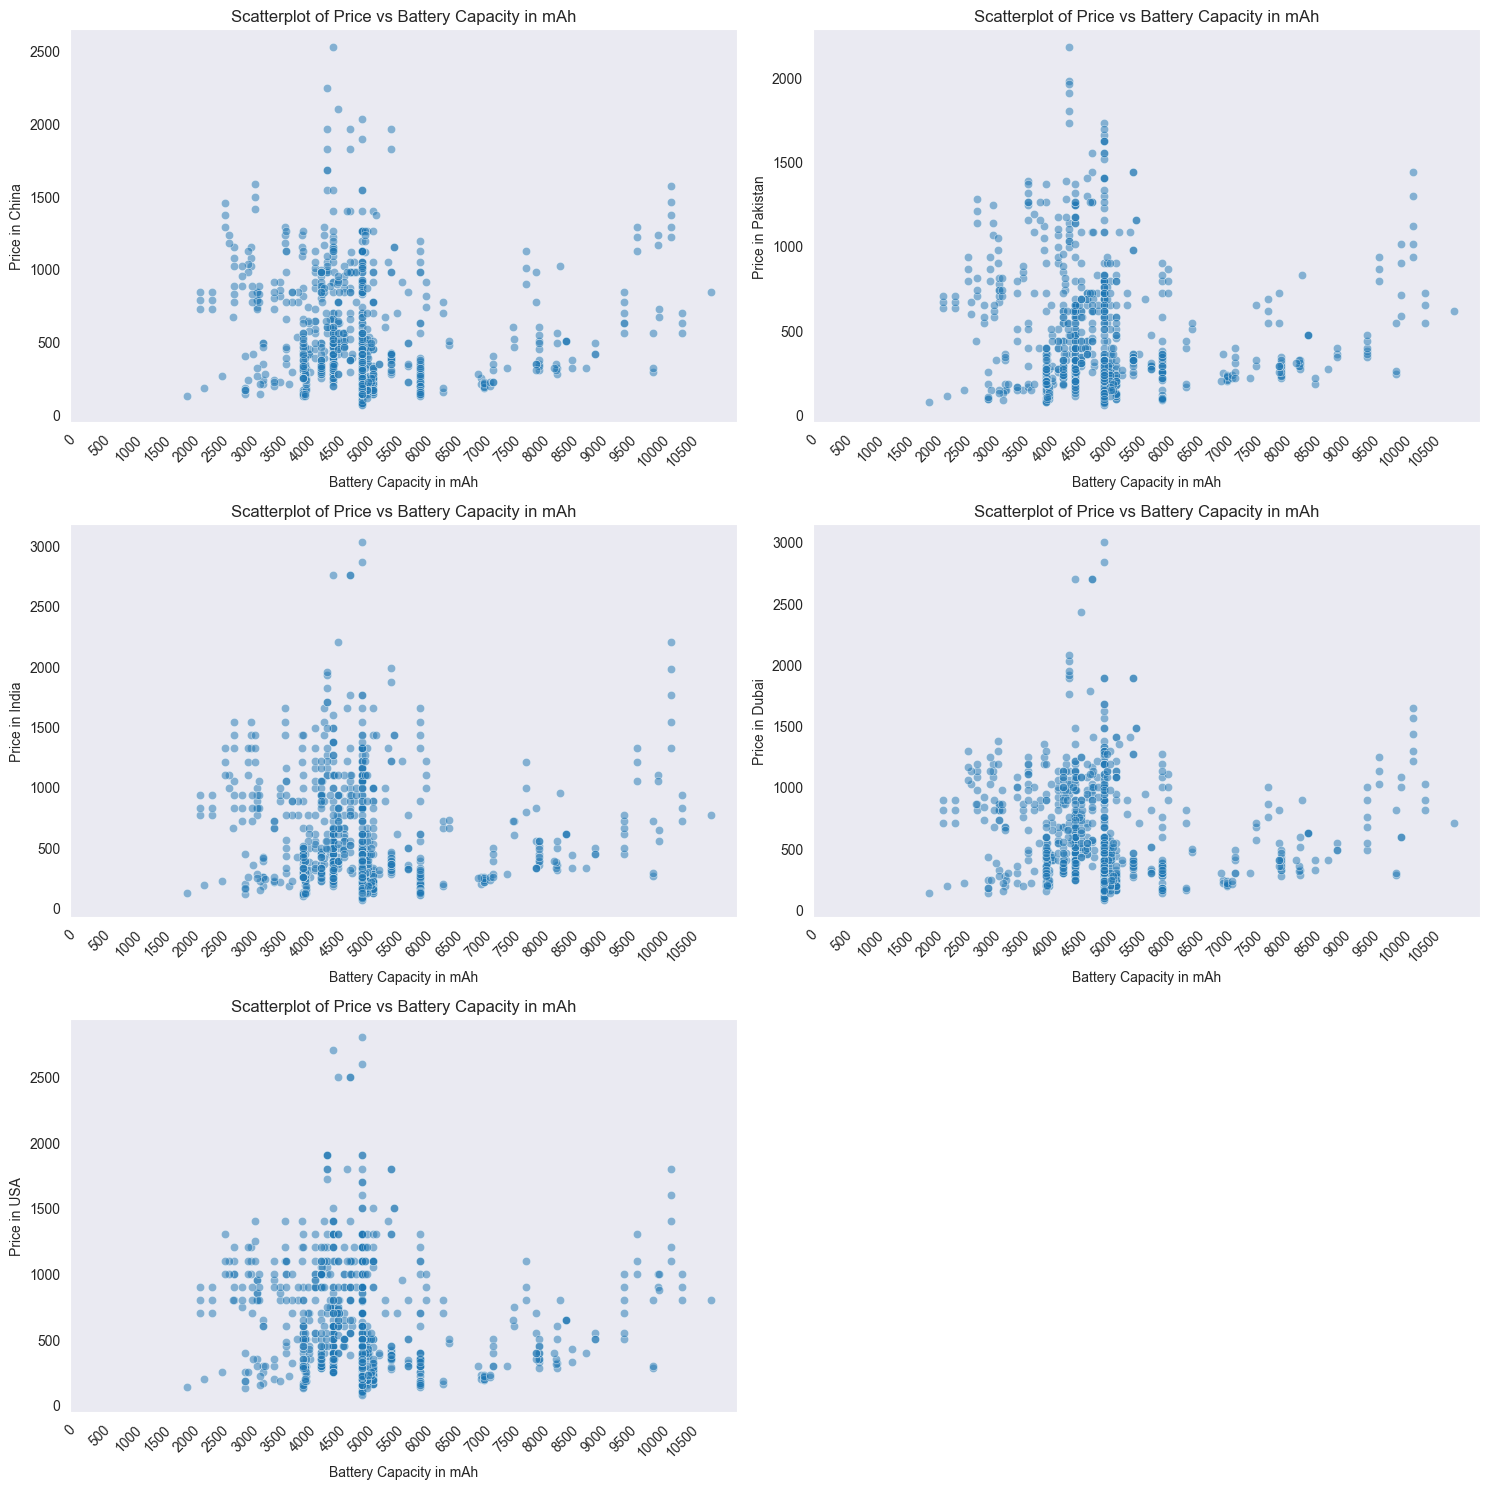

In [130]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
sns.scatterplot(x=df["Battery.Capacity.mAh"], y=df["Launched.Price.Pakistan.PKR"], alpha=0.5, ax=ax[0, 1])
sns.scatterplot(x=df["Battery.Capacity.mAh"], y=df["Launched.Price.India.INR"], alpha=0.5, ax=ax[1, 0])
sns.scatterplot(x=df["Battery.Capacity.mAh"], y=df["Launched.Price.Dubai.AED"], alpha=0.5, ax=ax[1, 1])
sns.scatterplot(x=df["Battery.Capacity.mAh"], y=df["Launched.Price.China.CNY"], alpha=0.5, ax=ax[0, 0])
sns.scatterplot(x=df["Battery.Capacity.mAh"], y=df["Launched.Price.USA.USD"], alpha=0.5, ax=ax[2, 0])
fig.delaxes(ax[2, 1])
for axes in ax.flatten():
    if axes:
        axes.set_xticks(np.arange(0, df["Battery.Capacity.mAh"].max(), step=500))
        axes.set_xticklabels(axes.get_xticks(), rotation=45)
        axes.set_xlabel('Battery Capacity in mAh')
        if len(axes.get_ylabel().split("."))>1:
            axes.set_ylabel(f'Price in {axes.get_ylabel().split(".")[2]}')
        axes.set_title('Scatterplot of Price vs Battery Capacity in mAh')
plt.tight_layout()

This plot gives an impression that the two features are uncorrelated, so for further investigation we can plot a correlation heatmap.

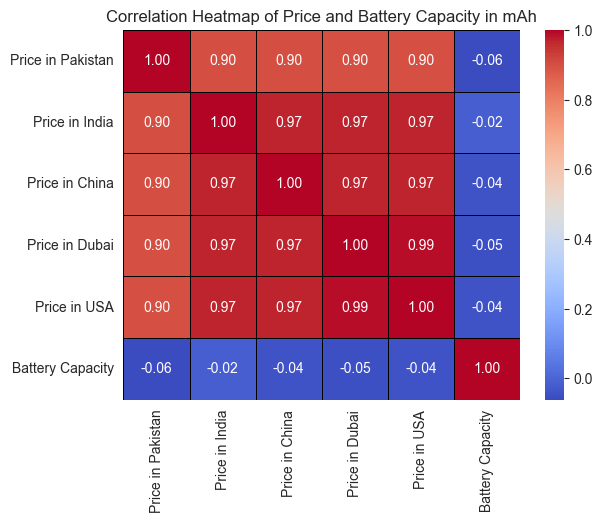

In [131]:
correlation = df.corr()
correlation = correlation[['Launched.Price.Pakistan.PKR', 
                           'Launched.Price.India.INR', 
                           'Launched.Price.China.CNY', 
                           'Launched.Price.Dubai.AED', 
                           'Launched.Price.USA.USD', 
                           'Battery.Capacity.mAh']]
correlation = correlation.loc[['Launched.Price.Pakistan.PKR', 
                           'Launched.Price.India.INR', 
                           'Launched.Price.China.CNY', 
                           'Launched.Price.Dubai.AED', 
                           'Launched.Price.USA.USD', 
                           'Battery.Capacity.mAh']]
fig, ax = plt.subplots()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black', ax=ax)
for ax in [ax]:  
    xticklabels = [label.get_text() for label in ax.get_xticklabels()]
    new_labels_x = []
    for label in xticklabels:
        if 'Price' in label:
            new_labels_x.append(f'Price in {label.split(".")[-2]}')  
        else:
            new_labels_x.append("Battery Capacity")  

    ax.set_xticklabels(new_labels_x)
    ax.set_yticklabels(new_labels_x) 
plt.title('Correlation Heatmap of Price and Battery Capacity in mAh');

The last column of the heatmap shows that Battery Capacity has ~0 correlation to Prices in all countries, we can even extract that only column as the rest is not much needed.

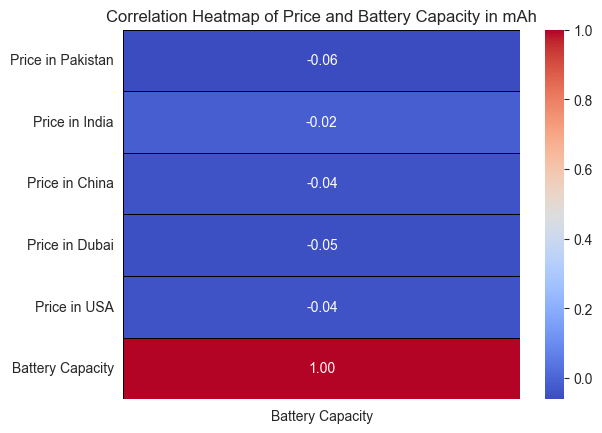

In [132]:
correlation = df.corr()
correlation = correlation[['Battery.Capacity.mAh']]
correlation = correlation.loc[['Launched.Price.Pakistan.PKR', 
                           'Launched.Price.India.INR', 
                           'Launched.Price.China.CNY', 
                           'Launched.Price.Dubai.AED', 
                           'Launched.Price.USA.USD', 
                           'Battery.Capacity.mAh']]
fig, ax = plt.subplots()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black', ax=ax)
for ax in [ax]:  
    xticklabels = [label.get_text() for label in ax.get_xticklabels()]
    yticklabels = [label.get_text() for label in ax.get_yticklabels()]
    new_labels_x = []
    new_labels_y = []
    for label in xticklabels:
        if 'Price' in label:
            new_labels_x.append(f'Price in {label.split(".")[-2]}')  
        else:
            new_labels_x.append("Battery Capacity")  
    for label in yticklabels:
        if 'Price' in label:
            new_labels_y.append(f'Price in {label.split(".")[-2]}')  
        else:
            new_labels_y.append("Battery Capacity")  

    ax.set_xticklabels(new_labels_x)
    ax.set_yticklabels(new_labels_y) 
plt.title('Correlation Heatmap of Price and Battery Capacity in mAh');

Here it is more eyecatching that across all regions thet battery capacity of a phone has 0 correlation to its price.

2. Does RAM size impact the price of smartphones? Check this variability across all currencies. Is there any type of difference between behaviors?

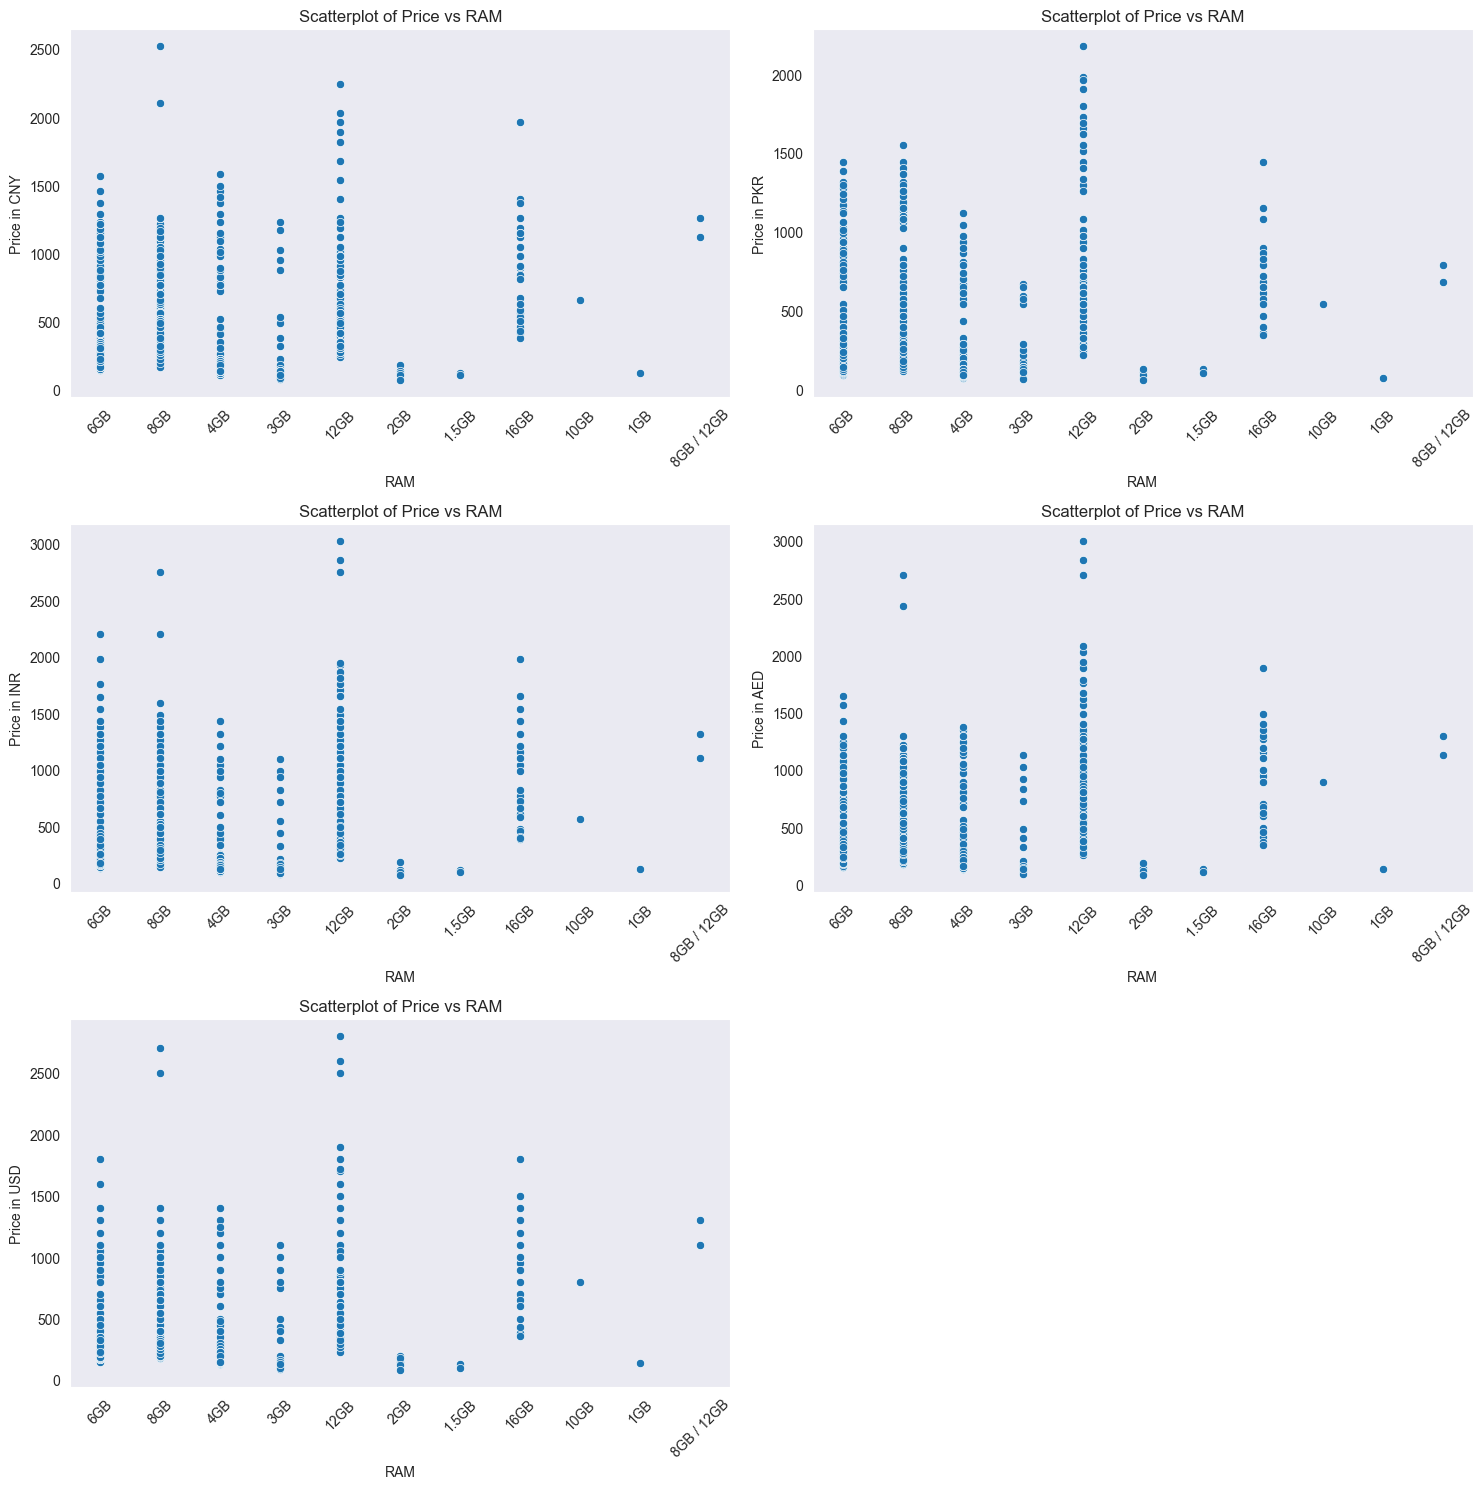

In [133]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
sns.scatterplot(x=df["RAM"], y=df["Launched.Price.China.CNY"], ax=ax[0, 0])
sns.scatterplot(x=df["RAM"], y=df["Launched.Price.Pakistan.PKR"], ax=ax[0, 1])
sns.scatterplot(x=df["RAM"], y=df["Launched.Price.India.INR"], ax=ax[1, 0])
sns.scatterplot(x=df["RAM"], y=df["Launched.Price.Dubai.AED"], ax=ax[1, 1])
sns.scatterplot(x=df["RAM"], y=df["Launched.Price.USA.USD"], ax=ax[2, 0])
fig.delaxes(ax[2, 1])
for axes in ax.flatten():
    if axes:
        axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
        axes.set_xlabel('RAM')
        axes.set_ylabel(f'Price in {axes.get_ylabel()[-3:]}')
        axes.set_title('Scatterplot of Price vs RAM')
plt.tight_layout()

In the scatterplot some positive correlation is visible, to further invastigate it we can again plot a heatmap.

In [134]:
df = df[df['RAM'] != '8GB/12GB']
df['RAM'] = df['RAM'].str.extract('(\d+)').astype(int)
correlation = df.corr()

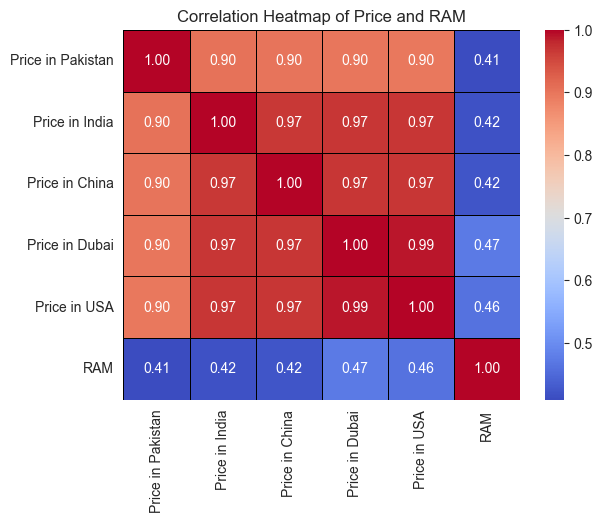

In [135]:
correlation = correlation[['Launched.Price.Pakistan.PKR',
                           'Launched.Price.India.INR',
                           'Launched.Price.China.CNY',
                           'Launched.Price.Dubai.AED',
                           'Launched.Price.USA.USD',
                           'RAM']]
correlation = correlation.loc[['Launched.Price.Pakistan.PKR',
                           'Launched.Price.India.INR',
                           'Launched.Price.China.CNY',
                           'Launched.Price.Dubai.AED',
                           'Launched.Price.USA.USD',
                           'RAM']]
fig, ax = plt.subplots()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black', ax=ax)
for ax in [ax]:  
    xticklabels = [label.get_text() for label in ax.get_xticklabels()]
    new_labels_x = []
    for label in xticklabels:
        if 'Price' in label:
            new_labels_x.append(f'Price in {label.split(".")[-2]}')  
        else:
            new_labels_x.append("RAM")  

    ax.set_xticklabels(new_labels_x)
    ax.set_yticklabels(new_labels_x) 
plt.title('Correlation Heatmap of Price and RAM');

The correlation is not very strong; however, and we cannot say that RAM has no impact on the price. This claim is true for all the regions in the dataset.

3. Do Apple devices have a higher price variation across different regions compared to other brands? In which country do Apple devices have the highest markup? Are there brands with more stable pricing across regions?

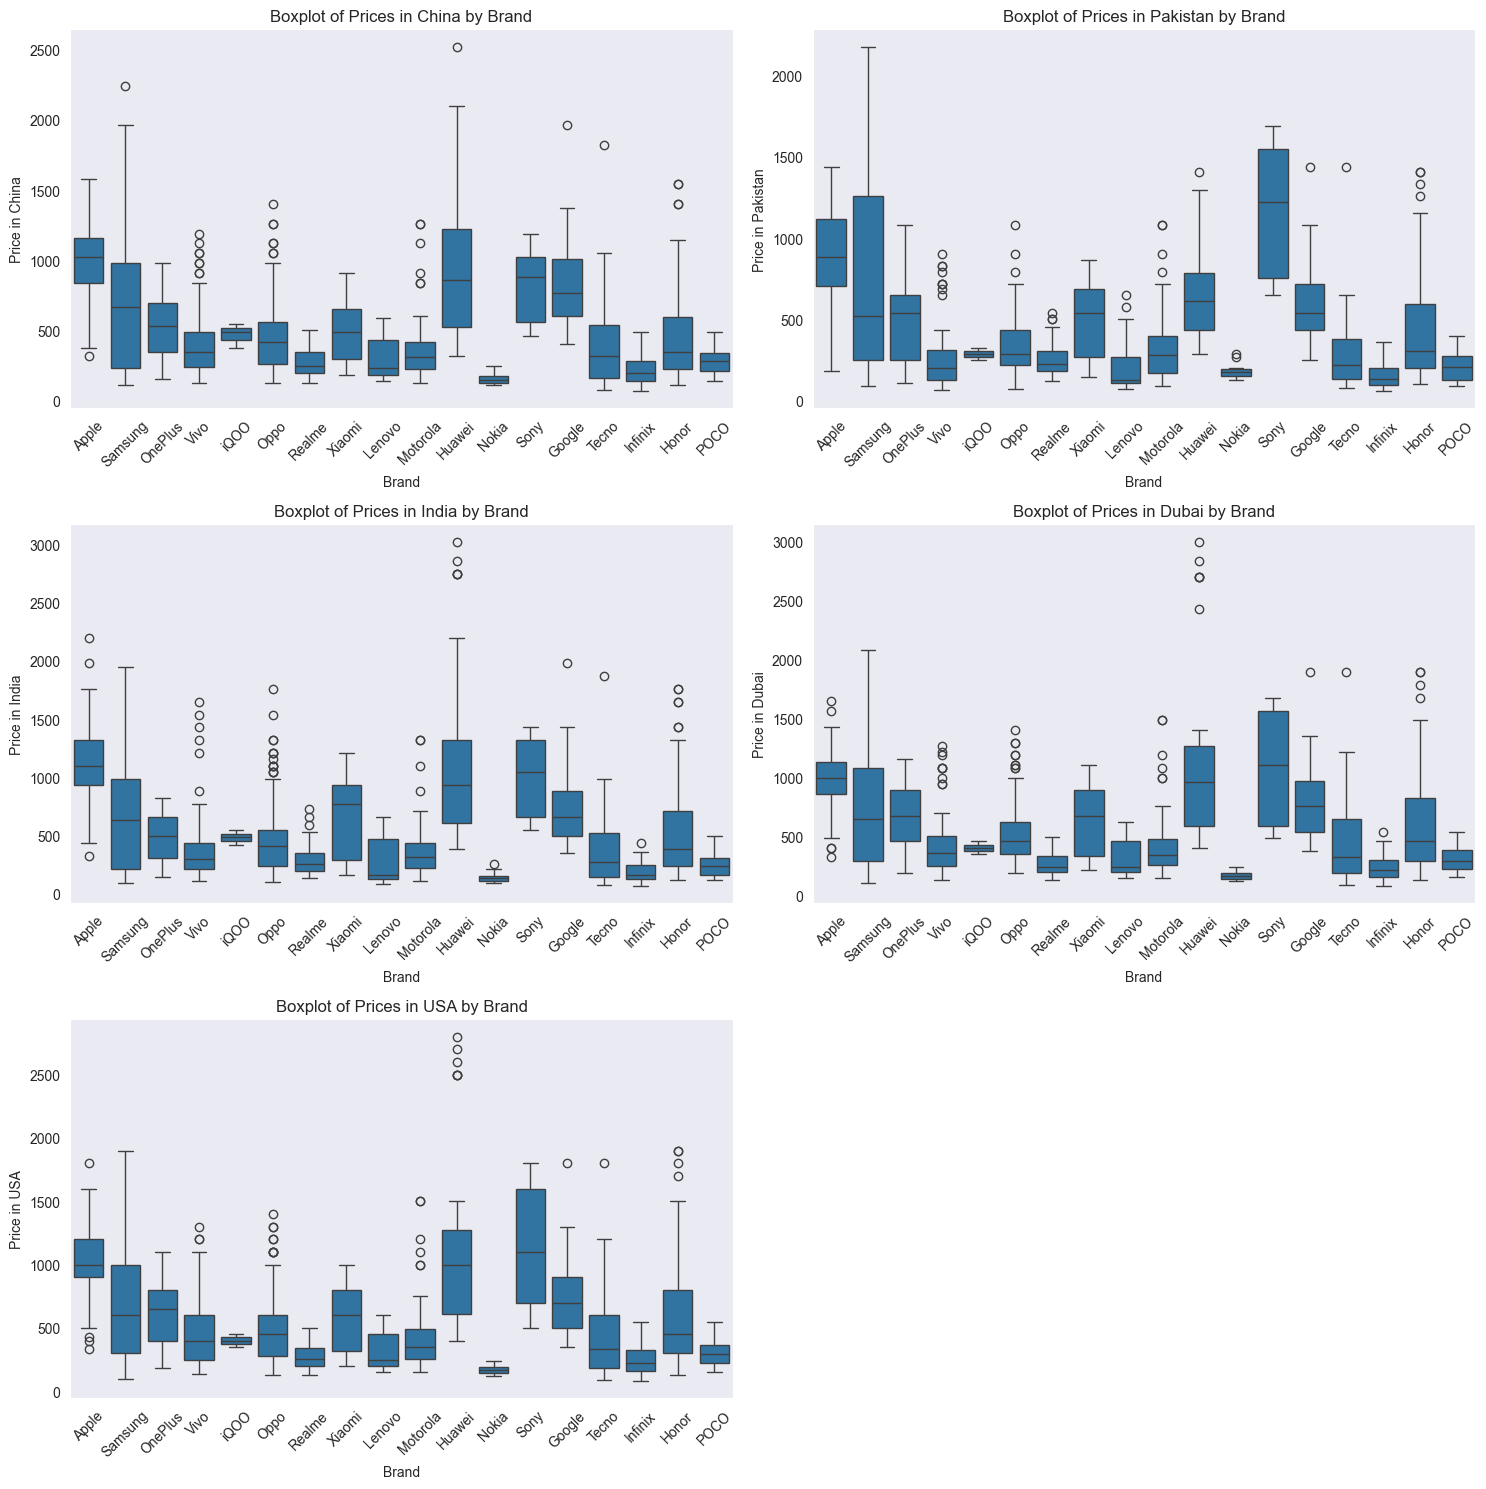

In [136]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
sns.boxplot(x=df["Company.Name"], y=df["Launched.Price.China.CNY"], ax=ax[0, 0])
sns.boxplot(x=df["Company.Name"], y=df["Launched.Price.Pakistan.PKR"], ax=ax[0, 1])
sns.boxplot(x=df["Company.Name"], y=df["Launched.Price.India.INR"], ax=ax[1, 0])
sns.boxplot(x=df["Company.Name"], y=df["Launched.Price.Dubai.AED"], ax=ax[1, 1])
sns.boxplot(x=df["Company.Name"], y=df["Launched.Price.USA.USD"], ax=ax[2, 0])
fig.delaxes(ax[2, 1])
for axes in ax.flatten():
    if axes:
        axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
        axes.set_xlabel('Brand')
        if len(axes.get_ylabel().split("."))> 2:
            axes.set_ylabel(f'Price in {axes.get_ylabel().split(".")[-2]}')
        axes.set_title(f'Boxplot of Prices{axes.get_ylabel()[5:]} by Brand')
plt.tight_layout()

The best plot in the world (boxplot) will give us a very clear understanding for this. The price of Apple devices varies a lot in Pakistan. In Dubai Apple devices are more or less concentrated around 1000 USD. Compared to other brands it would be unfair to say that Apple has higher price variation because Samsung and Sonny varie much more than Apple. Huawei also has some price variation in Pakistan. The most stable brands are Nokia, iQOO and Google.

4. Do all smartphone brands have flagship and budget-friendly models, or do some brands only focus on premium devices?

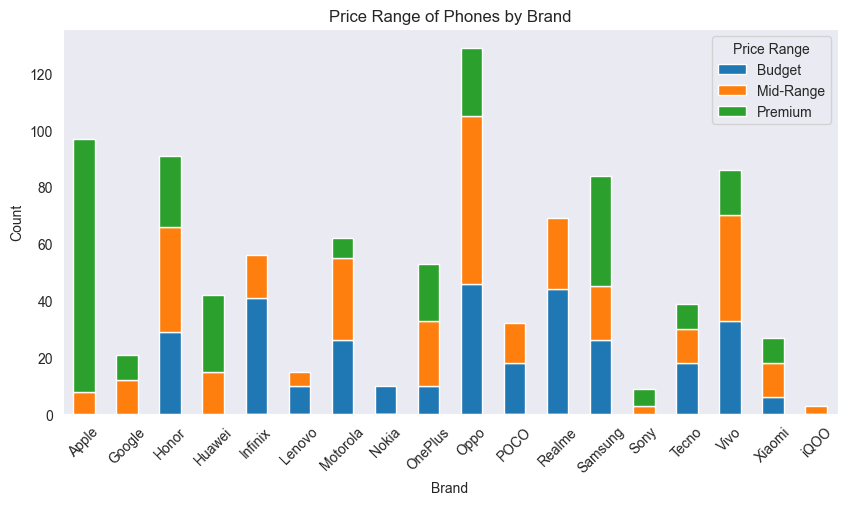

In [137]:
df['Price.Range'] = df.apply(lambda x: 'Budget' if x['Launched.Price.USA.USD'] <= 300 else ('Mid-Range' if x['Launched.Price.USA.USD'] <= 700 else 'Premium'), axis=1)
df.groupby('Company.Name')['Price.Range'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Price Range of Phones by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Price Range');

Apple mostly concentrates on Premium devices. Most of the other brands mostly concentrate on Budget and Mid-Range devices. Some have equal distribution of all types.

5. Which region offers the most affordable smartphone prices on average? Are there any brands that price their phones significantly lower in one region compared to others?

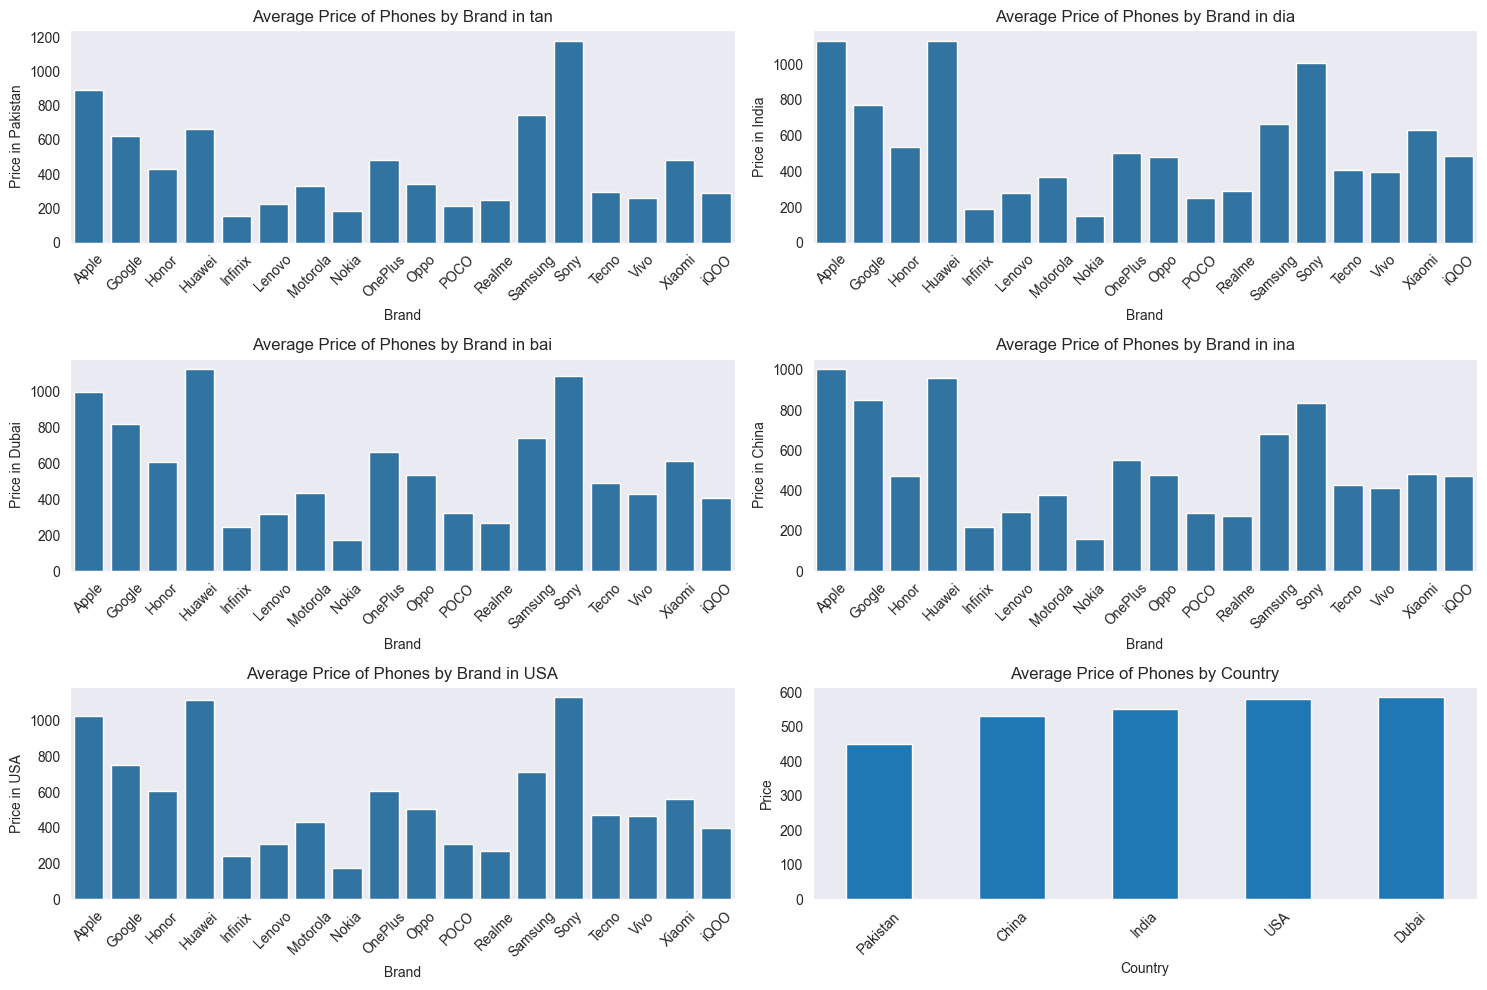

In [138]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
brand_df = df.groupby('Company.Name').mean()
sns.barplot(x=brand_df.index, y=brand_df['Launched.Price.Pakistan.PKR'], ax=ax[0, 0])
sns.barplot(x=brand_df.index, y=brand_df['Launched.Price.India.INR'], ax=ax[0, 1])
sns.barplot(x=brand_df.index, y=brand_df['Launched.Price.Dubai.AED'], ax=ax[1, 0])
sns.barplot(x=brand_df.index, y=brand_df['Launched.Price.China.CNY'], ax=ax[1, 1])
sns.barplot(x=brand_df.index, y=brand_df['Launched.Price.USA.USD'], ax=ax[2, 0])
df.rename({'Launched.Price.USA.USD': 'USA',
           'Launched.Price.India.INR': 'India',
            'Launched.Price.Pakistan.PKR': 'Pakistan',
            'Launched.Price.Dubai.AED': 'Dubai',
            'Launched.Price.China.CNY': 'China'}, axis=1, inplace=True)
mean_price = df[['USA', 'India', 'Pakistan', 'Dubai', 'China']].mean().sort_values()
mean_price.plot(kind='bar', ax=ax[2, 1])
for axes in ax.flatten():
    if axes:
        axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
        axes.set_xlabel('Brand')
        if len(axes.get_ylabel().split("."))> 2:
            axes.set_ylabel(f'Price in {axes.get_ylabel().split(".")[-2]}')
        axes.set_title(f'Average Price of Phones by Brand in {axes.get_ylabel()[-3:]}')
ax[2,1].set_xlabel('Country')
ax[2,1].set_ylabel('Price')
ax[2,1].set_title('Average Price of Phones by Country')
plt.tight_layout()


On avarage Pakistan offers the most cheap smartphones. For example, Apple devices cost on avarage 1000$ across all regions except Pakistan, there on avarage their price is ~900$. Sony devices also have various prices across countris. They have cheaper price in India and China. Also OnePlus in India, iQOO in Pakistan, Huawei in Pakistan and so on. Others cost more or less the same

### Part 2: Visualization

1. Plot a bar chart for average price per region in USD.

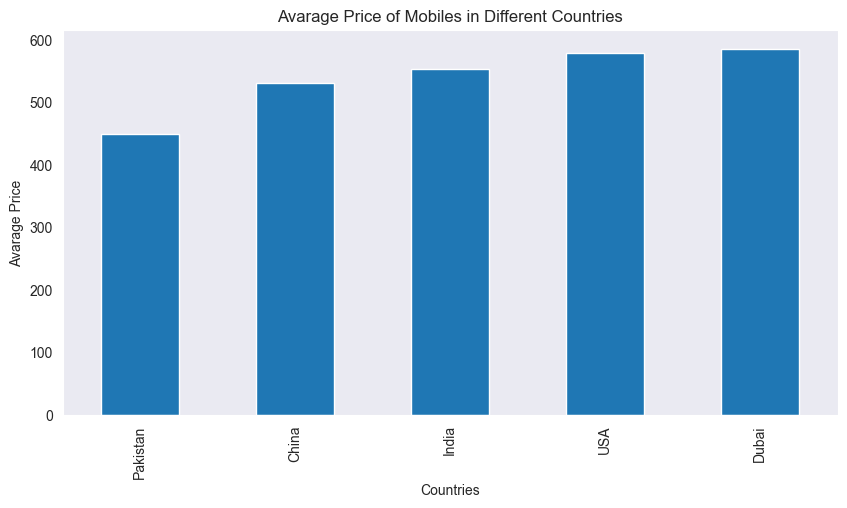

In [139]:
mean_price.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Countries')
plt.ylabel('Avarage Price')
plt.title('Avarage Price of Mobiles in Different Countries');

2. Create a pie chart of the market share of smartphone brands.

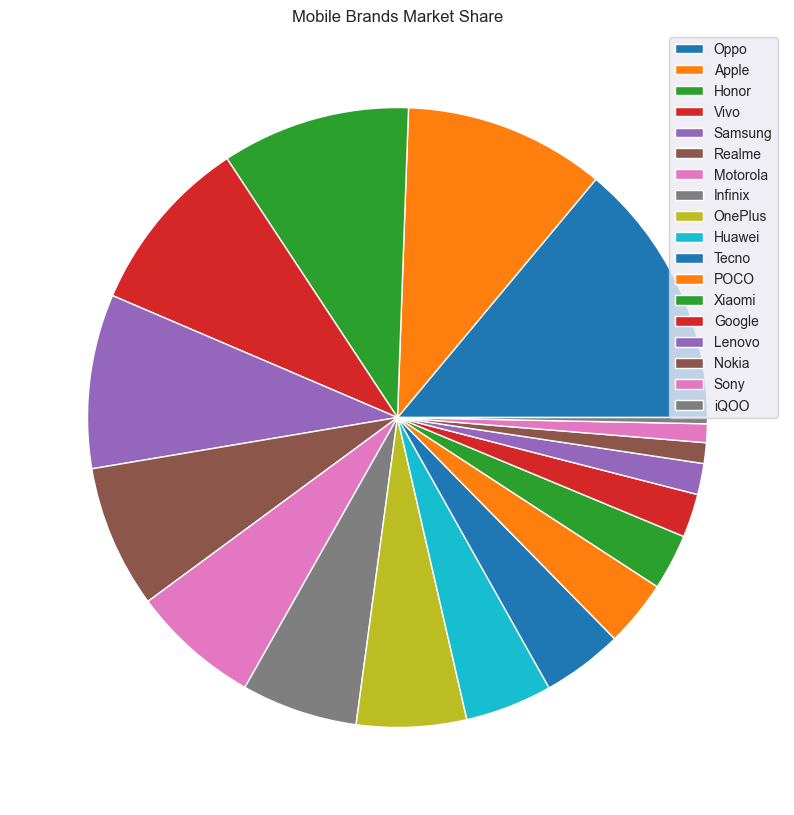

In [140]:
brand_counts = df['Company.Name'].value_counts()
fig = plt.figure(figsize=(10, 15))
plt.pie(brand_counts)
plt.title('Mobile Brands Market Share')
plt.ylabel('')
plt.legend(brand_counts.index, loc='best');

### Part 4

Using either R or Python, explain what else affects the prices of mobile phones. Summarize your
findings.

In [141]:
df.head()

,Company.Name,Model.Name,Mobile.Weight,RAM,Front.Camera,Back.Camera,Processor,Battery.Capacity.mAh,Screen.Size.inches,Pakistan,India,China,USA,Dubai,Launched.Year,Price.Range
0,Apple,iPhone 16 128GB,174g,6,12MP,48MP,A17 Bionic,3600,6.1,809.9964,879.989,811.86,799,755.73,2024,Premium
1,Apple,iPhone 16 256GB,174g,6,12MP,48MP,A17 Bionic,3600,6.1,845.9964,934.989,853.86,849,809.73,2024,Premium
2,Apple,iPhone 16 512GB,174g,6,12MP,48MP,A17 Bionic,3600,6.1,881.9964,989.989,909.86,899,863.73,2024,Premium
3,Apple,iPhone 16 Plus 128GB,203g,6,12MP,48MP,A17 Bionic,4200,6.7,899.9964,989.989,867.86,899,863.73,2024,Premium
4,Apple,iPhone 16 Plus 256GB,203g,6,12MP,48MP,A17 Bionic,4200,6.7,935.9964,1044.989,909.86,949,917.73,2024,Premium


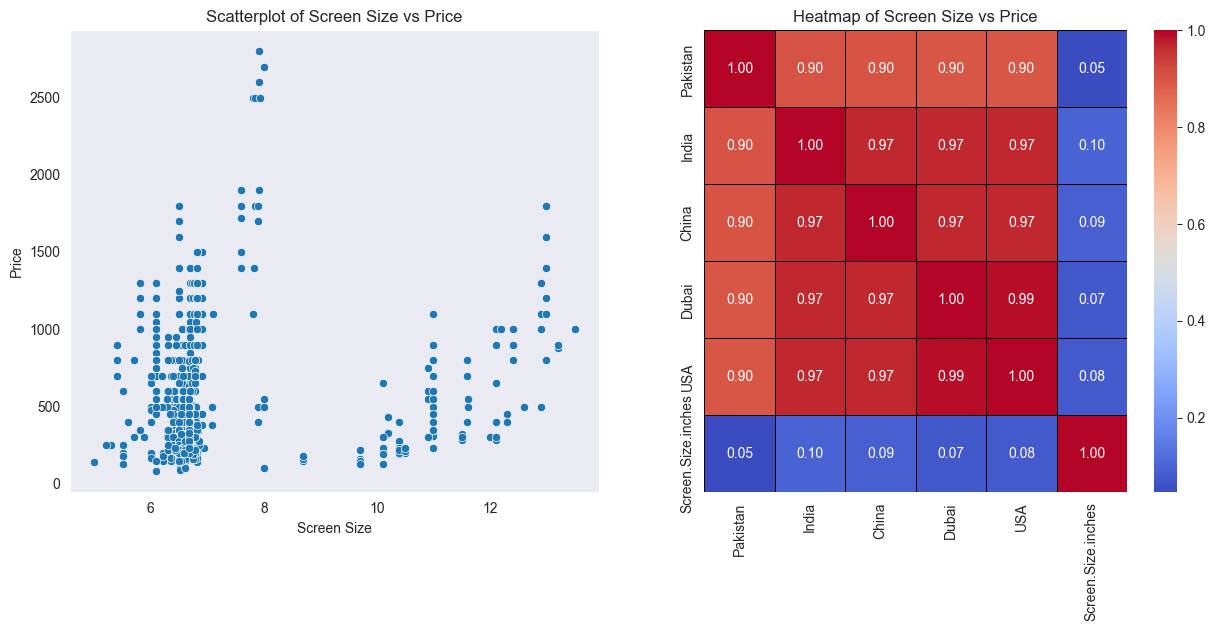

In [142]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.scatterplot(data=df, x='Screen.Size.inches', y='USA', ax=ax[0])
ax[0].set_xlabel('Screen Size')
ax[0].set_ylabel('Price')
ax[0].set_title('Scatterplot of Screen Size vs Price')
correlation = df.corr()
correlation = correlation[['Pakistan',
                           'India',
                           'China',
                           'Dubai',
                           'USA',
                           'Screen.Size.inches']]
correlation = correlation.loc[['Pakistan',
                           'India',
                           'China',
                           'Dubai',
                           'USA',
                           'Screen.Size.inches']]
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black', ax=ax[1])
ax[1].set_title('Heatmap of Screen Size vs Price');

The scatterplot gives a hint that when screen sizes is larger that 8 inches there is some positive correlation; however, in general the correlation is close to zero, as heatmap shows. We can filter the data to see what happens there.

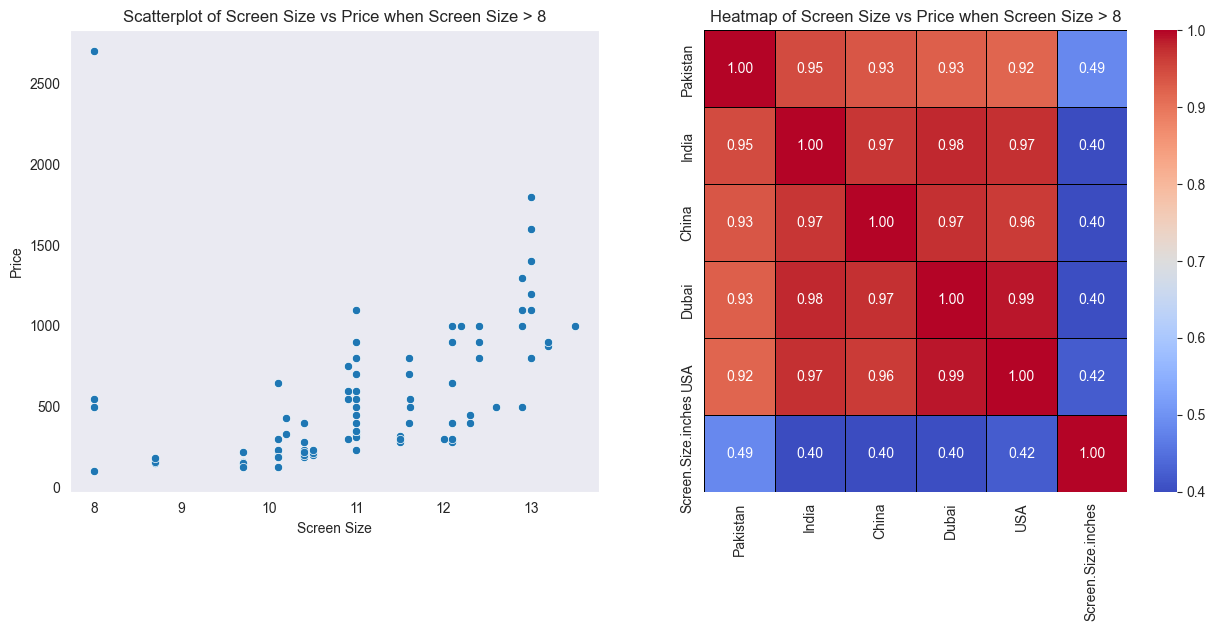

In [143]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
df_filtered = df[df['Screen.Size.inches']>=8]
sns.scatterplot(data=df_filtered, x='Screen.Size.inches', y='USA', ax=ax[0])
ax[0].set_xlabel('Screen Size')
ax[0].set_ylabel('Price')
ax[0].set_title('Scatterplot of Screen Size vs Price when Screen Size > 8')
correlation = df_filtered.corr()
correlation = correlation[['Pakistan',
                           'India',
                           'China',
                           'Dubai',
                           'USA',
                           'Screen.Size.inches']]
correlation = correlation.loc[['Pakistan',
                           'India',
                           'China',
                           'Dubai',
                           'USA',
                           'Screen.Size.inches']]
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black', ax=ax[1])
ax[1].set_title('Heatmap of Screen Size vs Price when Screen Size > 8');

Here we can see that our assumption was true as there is some correlation. So we can say that Screen Size affects price but not too much. However, the correlation is much simillar to log correlation...

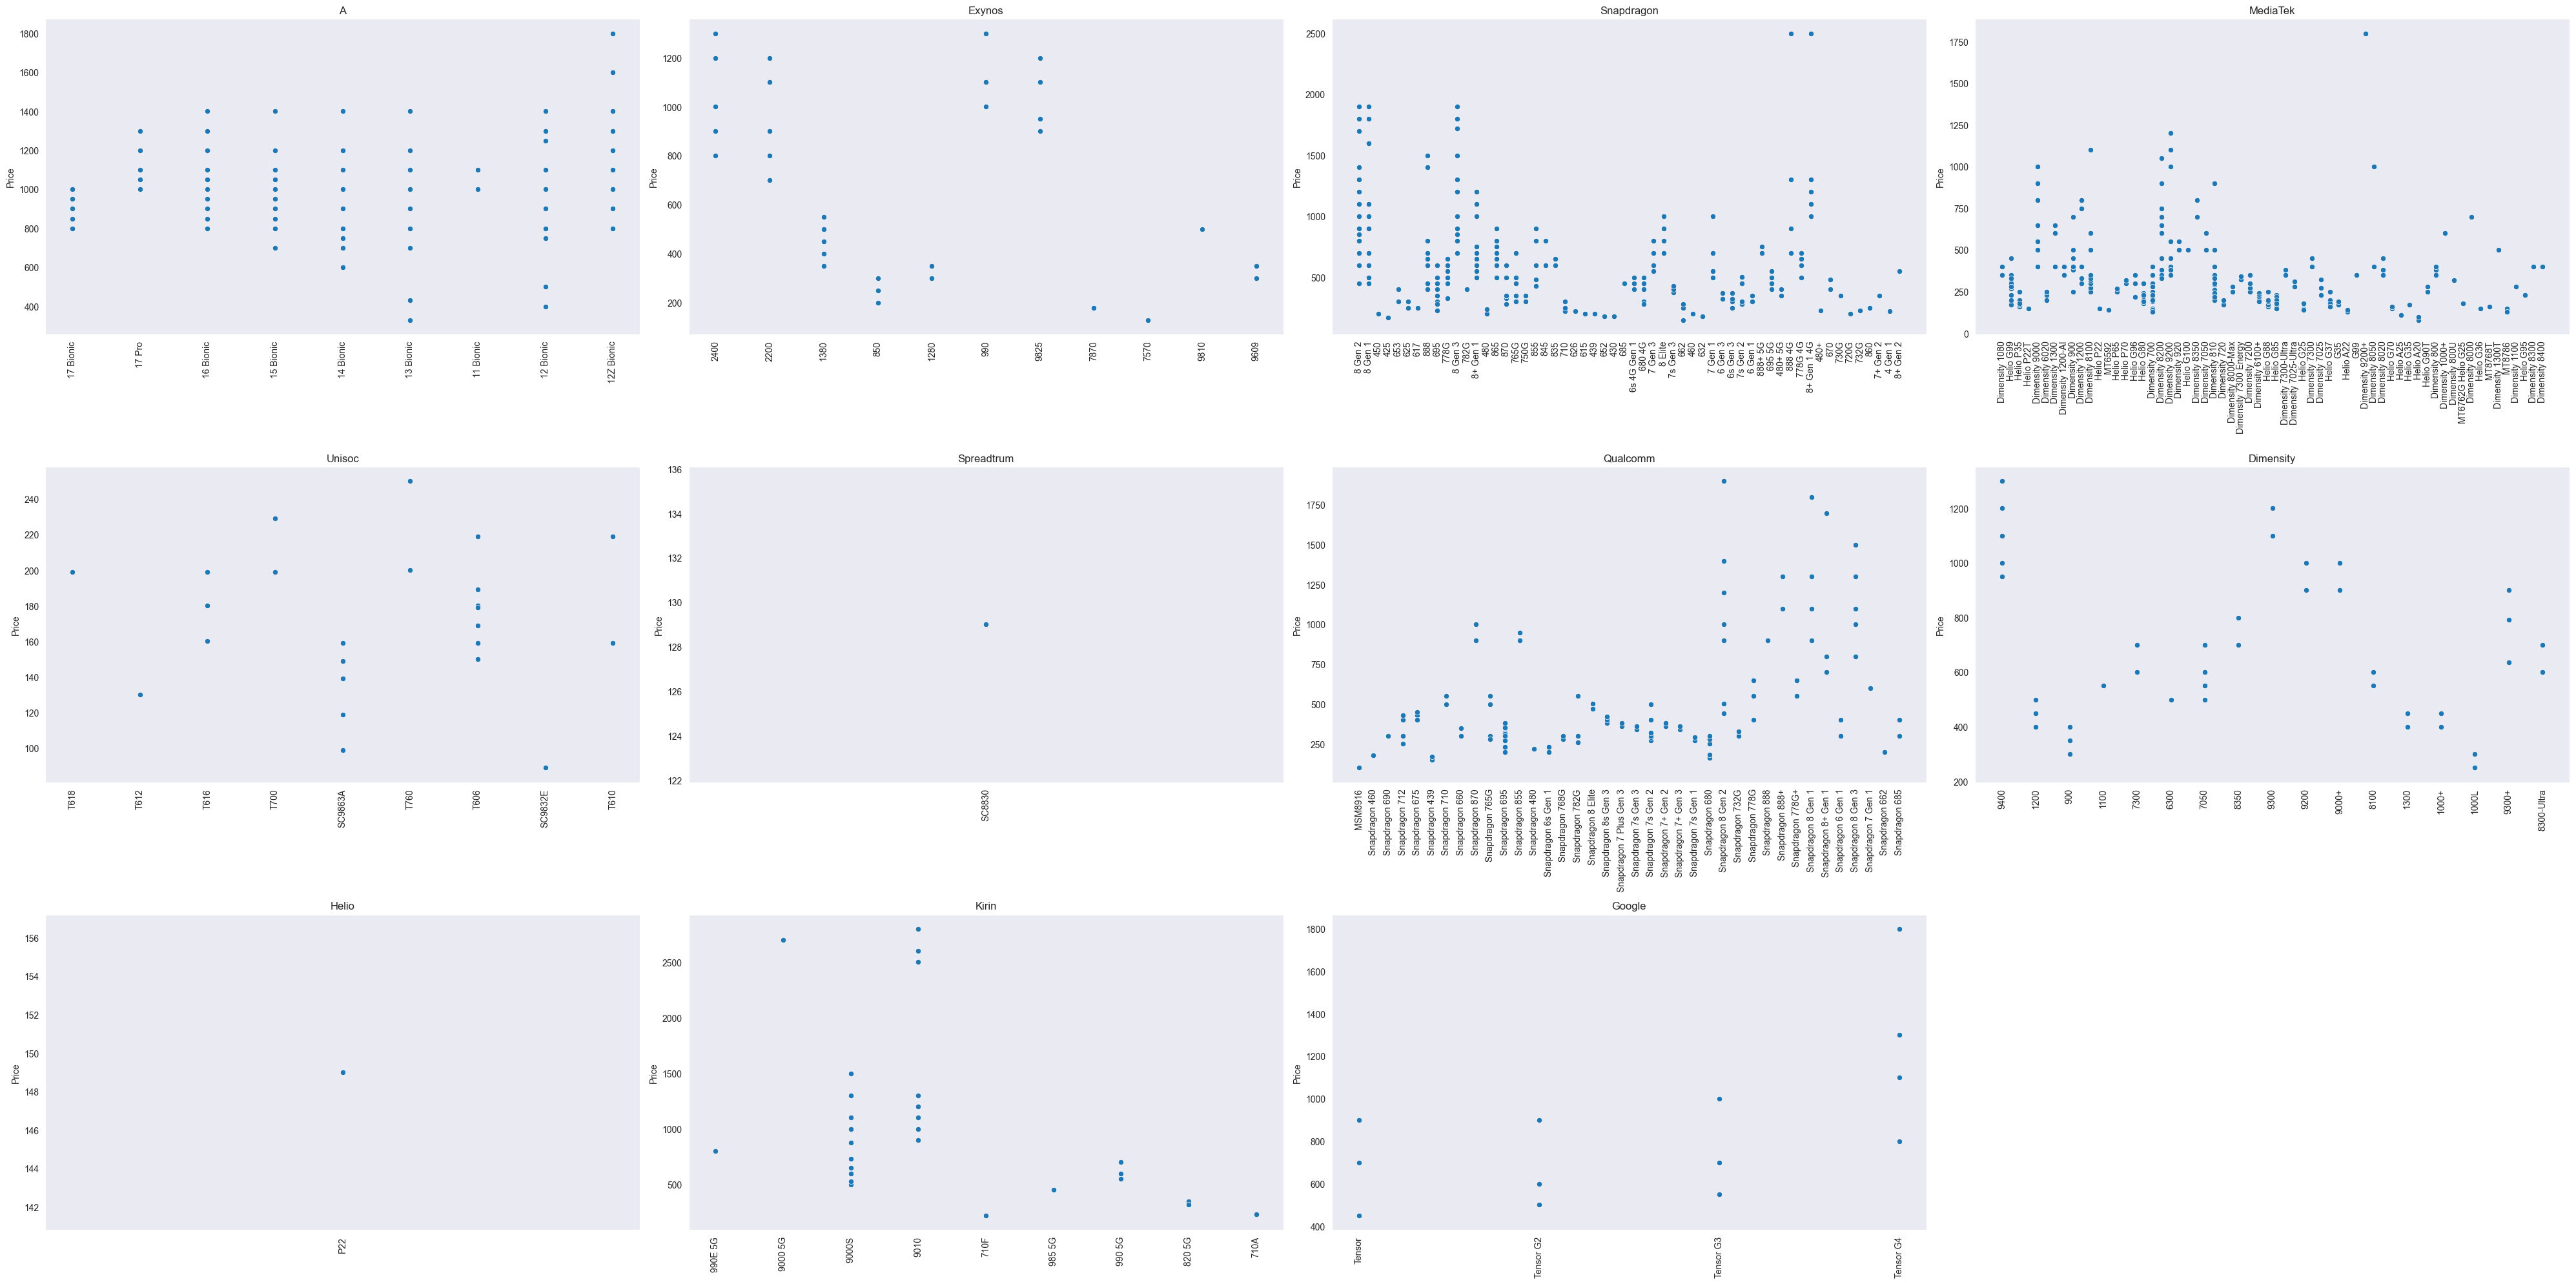

In [ ]:
import math
df['Proc.Model'] = df['Processor'].apply(lambda x: ' '.join(x.split(' ')[1:]) if len(x.split(' ')) > 1 else None)
df['Proc.Company'] = df['Processor'].apply(lambda x: x.split(' ')[0] if 'A1' not in x else x.split(' ')[0][0])
df['Proc.Model'] = df['Processor'].apply(lambda x: x[1:] if x[0]=='A' else(' '.join(x.split(' ')[1:]) if len(x.split(' ')) > 1 else None))


n_cols = math.ceil(math.sqrt(len(df['Proc.Company'].unique())))
n_rows = math.ceil(len(df['Proc.Company'].unique()) / n_cols)

fig, ax = plt.subplots(n_rows, n_cols, figsize=(40, 20))
ax = ax.flatten()


for i, company in enumerate(df['Proc.Company'].unique()):
    subset = df[df['Processor_Company'] == company]
    sns.scatterplot(x=subset['Processor_Model'], y=subset['USA'], ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
    ax[i].set_title(company)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Price')

for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])
plt.tight_layout()

The scatterplots show that there is some correlation of Processor Models and Smartphone price, except some Processor Brands such as Helio, Spreadtrum, Unisoc others are correlated. So processor brand and model impacts smartphone price.